# System Identification using Least Squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part (a)


<img style="float:left" src="images/resistor.png" width="225"/>

In [2]:
data = pd.read_csv('data/iv_part_a.csv')
display(data.head())
i, v = data['Current'].values, data['Voltage'].values

,Voltage,Current
0,0.000000,0.000050
1,0.012821,0.000062
2,0.025641,0.000075
3,0.038462,0.000088
4,0.051282,0.000101


Set up and solve a Least-Squares problem to solve for the resistance $R$ for inputs $V$ and outputs $I$

In [3]:
# Your Code Here #
n = len(data)
X = np.reshape(v, (n, 1))
y = np.reshape(i, (n, 1))
################

w = np.linalg.lstsq(X, y, rcond=None)[0]

print('The resistance R = {:.1f}'.format(1/w[0][0]))

The resistance R = 871.7


## Part (b)


<img style="float:left" src="images/diode.png" width="250"/>

In [4]:
data = pd.read_csv('data/iv_part_b.csv')
display(data.head())
Id, Vd = data['Id'].values, data['Vd'].values

,Vd,Id
0,0.000000,0.000014
1,0.020202,0.000065
2,0.040404,0.000152
3,0.060606,0.000023
4,0.080808,0.000023


In [5]:
# Your Code Here #
n = len(data)
X = np.column_stack((Vd, np.ones(n))) 
y = np.log(Id)
################

w = np.linalg.lstsq(X, y, rcond=None)[0]
print(w)

[ 33.05578766 -20.05469374]


## Part (c)

The states $d_{L}$ and $d_{R}$ represent the position of the wheels of your SIXT33N Car. The discrete model is

$$ \begin{equation}
    \begin{bmatrix} d_{L}(t+1) \\ d_{R}(t+1) \end{bmatrix} = A \begin{bmatrix} d_{L}(t) \\ d_{R}(t) \end{bmatrix} + B \begin{bmatrix} u_{L}(t) \\ u_{R}(t) \end{bmatrix}
  \end{equation} $$


The position and input data for $t = 0, \ldots, 100$ are stored in car_data.csv. 

Use this data to set up a Least-Squares problem to solve for the $A$ and $B$ matrices. Make sure you understand why $u_{L}(100)$ and $u_{R}(100)$ are undefined.

In [6]:
data = pd.read_csv('data/car_data.csv')
display(data.head(5))
display(data.tail(5))

,t,dL,dR,uL,uR
0,0.0,0.000000,0.000000,-0.420645,-0.342715
1,1.0,-1.064955,0.610208,-0.802277,-0.161286
2,2.0,-1.371843,0.235234,0.404051,1.886186
3,3.0,-0.655994,2.059619,0.174578,0.257550
4,4.0,-1.178434,2.026251,-0.074446,-1.918771


,t,dL,dR,uL,uR
96,96.0,-4.485227,-1.295487,0.849602,0.357015
97,97.0,-3.748917,0.310567,-0.692910,0.899600
98,98.0,-3.697663,-0.834901,0.307300,0.812862
99,99.0,-3.065986,-1.504671,0.629629,-0.828995
100,100.0,-3.236166,-0.765289,NaN,NaN


In [7]:
dists = np.array(data[['dL', 'dR']])
inputs = np.array(data[['uL', 'uR']])

# Your Code Here #
X = dists[:-1,]
y = dists[1:,]
u = inputs[:-1,]
D = np.column_stack((X, u))
################

w = np.linalg.lstsq(D, y, rcond=None)[0]

A = w[:2,].T
B = w[2:,].T

print('The A matrix is \n{}'.format(A))
print('The B matrix is \n{}'.format(B))

The A matrix is 
[[ 0.68864803 -0.66622717]
 [-0.06220561  0.38645513]]
The B matrix is 
[[1.26629358 0.11414019]
 [0.26002853 0.46617883]]


## Part (d)

Try plotting the values of $d_{L}$ and $d_{R}.$ You may find `plt.scatter` to be helpful.

What do you notice when plotting? 
Is there a way for Taejin and Nick to recover the true values of $A$ and $B?$

(100, 2)


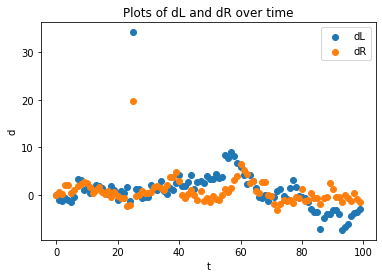

In [8]:
plt.scatter(range(100), X[:,0], label='dL')
plt.scatter(range(100), X[:,1], label='dR')
plt.xlabel('t')
plt.ylabel('d')
plt.title('Plots of dL and dR over time')
plt.legend();

print(X.shape)

Notice the single outlier point which corrupts our Least-Squares solution.

We can remove the point and rerun Least-Squares to get a better sense of what the true values of $A$ and $B$ are.

The A matrix is 
[[ 0.89634455 -0.05536831]
 [ 0.06185562  0.75174818]]
The B matrix is 
[[ 1.08661035 -0.0187239 ]
 [ 0.15190041  0.38305129]]


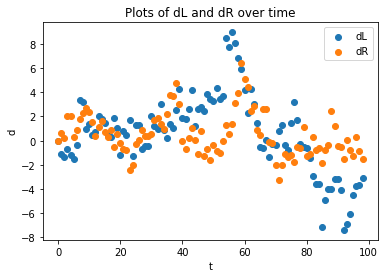

In [9]:
idx = np.argmax(X[:,0])

X = np.delete(X.copy(), 25, 0)
y = np.delete(y.copy(), 24, 0)
u = np.delete(u.copy(), 24, 0)
D = np.column_stack((X, u))

plt.scatter(range(99), X[:,0], label='dL')
plt.scatter(range(99), X[:,1], label='dR')
plt.xlabel('t')
plt.ylabel('d')
plt.title('Plots of dL and dR over time')
plt.legend();

w = np.linalg.lstsq(D, y, rcond=None)[0]

A = w[:2,].T
B = w[2:,].T

print('The A matrix is \n{}'.format(A))
print('The B matrix is \n{}'.format(B))

## Final Remarks

Given the matrix-vector equation $X \vec{w} = \vec{y},$ the Least-Squares solution tries to find the "best" $\vec{w}$ 
that minimizes

$$\vec{w} = \mbox{argmin}_{\vec{w}} ||{X \vec{w} - \vec{y}}||^{2}$$

However, we've seen in this question that the squared-norm, referred to as the 'Mean Squared Error' is susceptible to outliers. If you take classes like Data 100, EE 127, or CS 189, you'll learn about techniques to detect and remove outliers along with other regression techniques that are robust to outliers.